In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
train_data=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\train_LZdllcl.csv")
test_data=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\test_2umaH9m.csv")
sample_submision=pd.read_csv(r"C:\Users\jakha\Downloads\hr analytic full\sample_submission_M0L0uXE.csv")
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
train_data.shape,test_data.shape,sample_submision.shape

((54808, 14), (23490, 13), (23490, 2))

In [5]:
full_data=pd.concat([train_data,test_data])
full_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0


In [6]:
full_data.shape

(78298, 14)

# lets explore the data


In [7]:
full_data.isnull().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

* null values are present in education,previous year ratings

# Univarient analysis

# feature 1 :: employee id

In [8]:
len(full_data.employee_id.unique())

78298

* all values are unique in employee id so it is not informative for me

In [9]:
full_data.drop('employee_id',axis=1,inplace=True)
full_data.shape

(78298, 13)

# feature 2 :: department

In [10]:
full_data.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

* there are 8 unique departments 

In [11]:
full_data.department.value_counts([0])*100

Sales & Marketing    30.850086
Operations           20.577793
Procurement          12.973511
Technology           12.962017
Analytics             9.797185
Finance               4.632302
HR                    4.473933
Legal                 1.895323
R&D                   1.837850
Name: department, dtype: float64

* sales and marketing have 30 persent of total  workers ,legal and R & D have only 1.83 percent worker

In [12]:
full_data.department.isnull().sum() # no null value persent

0

# feature :: 3 region 

In [13]:
len(full_data.region.unique())# 34 unique region are given in the columns

34

In [14]:
full_data.region.value_counts([0])*100 # except 1 or 2 regions all other regions have very few population

region_2     22.531865
region_22    11.707834
region_7      8.716698
region_15     5.029503
region_13     4.872411
region_26     4.177629
region_31     3.549261
region_4      3.164832
region_27     3.025620
region_16     2.624588
region_28     2.443230
region_11     2.408746
region_23     2.159698
region_29     1.798258
region_32     1.759943
region_19     1.639889
region_14     1.503231
region_20     1.501954
region_17     1.477688
region_25     1.476411
region_5      1.415106
region_6      1.261846
region_30     1.187770
region_8      1.180107
region_10     1.171167
region_1      1.083042
region_24     0.928504
region_12     0.913178
region_9      0.766303
region_21     0.753531
region_3      0.629646
region_34     0.570896
region_33     0.504483
region_18     0.065136
Name: region, dtype: float64

<AxesSubplot:xlabel='region', ylabel='Density'>

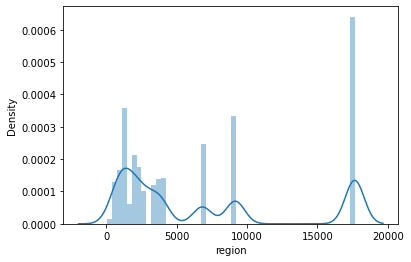

In [15]:
mapp=full_data.region.value_counts() # lets replace the region by there frequency of apearance
full_data.region=full_data.region.apply(lambda x:mapp[x])
sns.distplot(full_data.region)

<AxesSubplot:xlabel='region'>

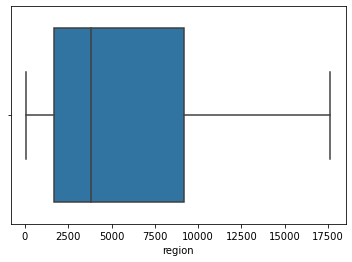

In [16]:
sns.boxplot(((full_data.region)))

# feature 4 ::education

In [17]:
full_data.education.unique()# three unique values and nan is present

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [18]:
full_data.education.value_counts([0])*100 # almost 70 percent employee are bechelors degree and only 1.5 percent are below sec

Bachelor's          69.797609
Master's & above    28.627346
Below Secondary      1.575045
Name: education, dtype: float64

In [19]:
full_data.education=full_data.education.replace({"Master's & above":2, "Bachelor's":1,  'Below Secondary':0})

In [20]:
full_data.education.unique()

array([ 2.,  1., nan,  0.])

In [21]:
full_data.education.dtypes

dtype('float64')

In [22]:
full_data.education.isnull().sum() # there are 3443 null values in education lets treat them by knn model

3443

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [24]:
ed_full_data=full_data.copy()
ed_full_data=pd.get_dummies(ed_full_data,drop_first=True)
xedtopredict=ed_full_data.loc[full_data.education.isnull(),:]
xedtrain=ed_full_data.loc[~full_data.education.isnull(),:]
xedpnew=xedtopredict.drop(['education','previous_year_rating','is_promoted'],axis=1)
xedtnew=xedtrain.drop(['previous_year_rating','is_promoted'],axis=1)
yed=xedtnew.education
xedtnew=xedtnew.drop('education',axis=1)
modeled=knn.fit(xedtnew,yed)
edpredict=modeled.predict(xedpnew)

In [25]:
full_data.loc[full_data.education.isnull(),'education']=edpredict
full_data.isnull().sum()

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# feature5 :: gender

In [26]:
full_data.gender.unique()# two categories in gender

array(['f', 'm'], dtype=object)

In [27]:
full_data.gender.value_counts([0])# 70 percent of employees are male remaining are female

m    0.70362
f    0.29638
Name: gender, dtype: float64

In [28]:
full_data.gender=full_data.gender.replace({'m':1,'f':0})

# feature 6 :: recruitment chennel

In [29]:
full_data.recruitment_channel.unique() # there are 3 type of recruitment chennel

array(['sourcing', 'other', 'referred'], dtype=object)

In [30]:
full_data.recruitment_channel.value_counts([0])*100 # 2 percent employee are recruited by reference and 42 percent by sourcing else by other

other       55.587627
sourcing    42.377839
referred     2.034535
Name: recruitment_channel, dtype: float64

# feature 7 :: no_of_trainings

In [31]:
full_data.no_of_trainings.unique()# employees has 1 to 10 numbers of trainings

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [32]:
full_data.no_of_trainings.value_counts([0])# 80 percent of employee gone through 1 trainings

1     0.808526
2     0.147271
3     0.032325
4     0.008404
5     0.002095
6     0.000868
7     0.000268
8     0.000089
9     0.000089
10    0.000064
Name: no_of_trainings, dtype: float64

<AxesSubplot:xlabel='no_of_trainings', ylabel='Density'>

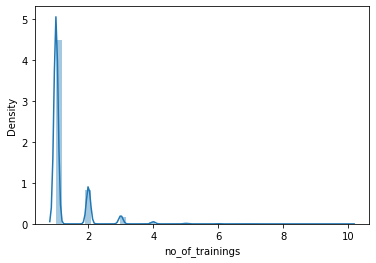

In [33]:
sns.distplot(full_data.no_of_trainings)# large number of outlier we can been this in categories

In [34]:
full_data.no_of_trainings=full_data.no_of_trainings.apply(lambda x:'one' if x==1 else 'morethan1')
full_data.no_of_trainings=full_data.no_of_trainings.replace({'one':0,'morethan1':1})

# feature 8:: Age

In [35]:
full_data.age.unique()

array([35, 30, 34, 39, 45, 31, 33, 28, 32, 49, 37, 38, 41, 27, 29, 26, 24,
       57, 40, 42, 23, 59, 44, 50, 56, 20, 25, 47, 36, 46, 60, 43, 22, 54,
       58, 48, 53, 55, 51, 52, 21], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Density'>

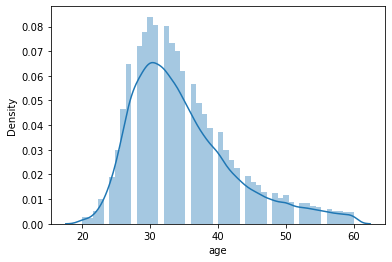

In [36]:
sns.distplot(full_data.age)# normally distributed and not muchh outliers are present

<AxesSubplot:xlabel='age', ylabel='Density'>

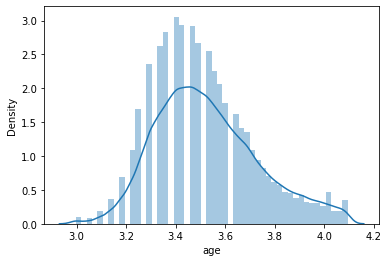

In [37]:
sns.distplot(np.log(full_data.age))

<AxesSubplot:xlabel='age'>

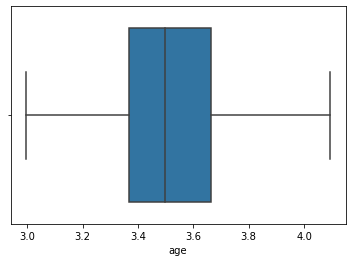

In [38]:
sns.boxplot(np.log(full_data.age))

In [39]:
full_data.age=np.log(full_data.age)

# feature 9 : previous year ratings

In [40]:
full_data.previous_year_rating.unique()# ratings are on the scale 1 to 5

array([ 5.,  3.,  1.,  4., nan,  2.])

In [41]:
full_data.previous_year_rating.value_counts([0])*100 # 36 percent of employee get 3 star of ratings only 23 percent have 5 *

3.0    36.675327
5.0    23.269119
4.0    19.521296
1.0    12.303419
2.0     8.230839
Name: previous_year_rating, dtype: float64

In [42]:
# have null values lets treat using knn

In [43]:
full_data.previous_year_rating.isnull().sum() # around 6000 of null values lets treat using knn

5936

In [44]:
knnp=KNeighborsClassifier()
ratingnulltreatment=full_data.drop('is_promoted',axis=1)
ratingnulltreatment=pd.get_dummies(ratingnulltreatment,drop_first=True)
trainrating=ratingnulltreatment.loc[~ratingnulltreatment.previous_year_rating.isnull(),]
ratingforprediction=ratingnulltreatment.loc[ratingnulltreatment.previous_year_rating.isnull(),]
xratingtr=trainrating.drop('previous_year_rating',axis=1)
yratingtr=trainrating.previous_year_rating
ratingforprediction.drop('previous_year_rating',inplace=True,axis=1)
modelrating=knnp.fit(xratingtr,yratingtr)
predictedrat=modelrating.predict(ratingforprediction)
full_data.loc[full_data.previous_year_rating.isnull(),'previous_year_rating']=predictedrat
full_data.isnull().sum()#all null values are treated

department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# feature 10 ::length of service

In [45]:
full_data.length_of_service.head()

0     8
1     4
2     7
3    10
4     2
Name: length_of_service, dtype: int64

In [46]:
full_data.length_of_service.describe()# avg is around 5.8 median is also around 5 but max=37 means outlier present

count    78298.000000
mean         5.848974
std          4.248070
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

<AxesSubplot:xlabel='length_of_service'>

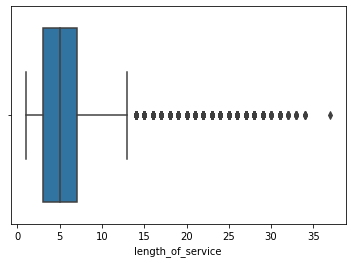

In [47]:
#lets examine the outlier and distribution
sns.boxplot(full_data.length_of_service)# outliers are present 

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

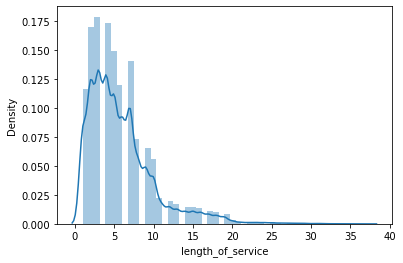

In [48]:
sns.distplot((full_data.length_of_service))

<AxesSubplot:xlabel='length_of_service'>

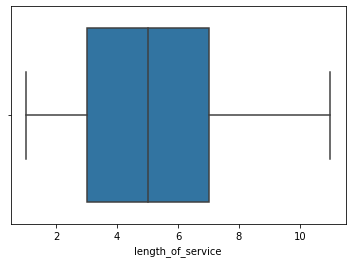

In [49]:
# lets treat outliers using caping
q5,q90=np.quantile(full_data.length_of_service,[.05,.90])
full_data.loc[full_data.length_of_service<q5,'length_of_service']=q5
full_data.loc[full_data.length_of_service>q90,'length_of_service']=q90
sns.boxplot(full_data.length_of_service)

<AxesSubplot:xlabel='length_of_service', ylabel='Density'>

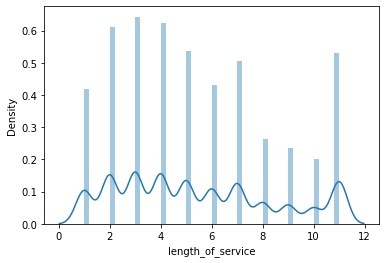

In [50]:
sns.distplot(full_data.length_of_service)# better now

# feature11 :: KPIs_met

In [51]:
full_data['KPIs_met >80%'].unique()

array([1, 0], dtype=int64)

In [52]:
full_data['KPIs_met >80%'].value_counts([0])# inly 35 percent employees met KPIs

0    0.645968
1    0.354032
Name: KPIs_met >80%, dtype: float64

# feature 12:::award_won

In [53]:
full_data['awards_won?'].unique()

array([0, 1], dtype=int64)

In [54]:
full_data['awards_won?'].value_counts([0])# only 2 percent of employees won the awards

0    0.976947
1    0.023053
Name: awards_won?, dtype: float64

# feature 13::avg training score

In [55]:
full_data.avg_training_score.head()

0    49
1    60
2    50
3    50
4    73
Name: avg_training_score, dtype: int64

In [56]:
full_data.avg_training_score.describe()# less chance of outliers

count    78298.000000
mean        63.349664
std         13.383664
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

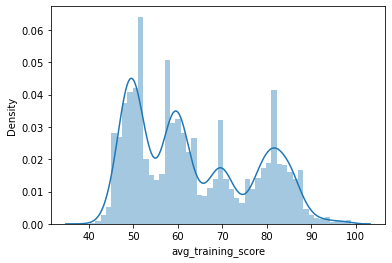

In [57]:
sns.distplot(full_data.avg_training_score)

<AxesSubplot:xlabel='avg_training_score'>

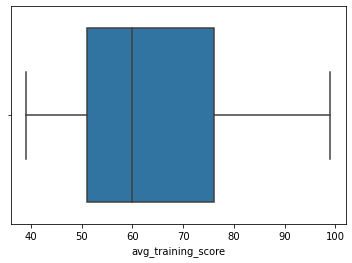

In [58]:
sns.boxplot(full_data.avg_training_score) # no outlier present

<AxesSubplot:xlabel='avg_training_score', ylabel='Density'>

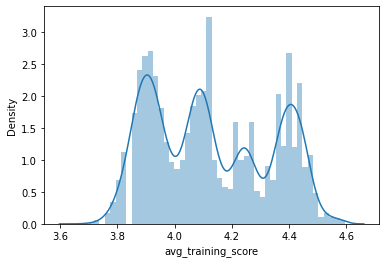

In [59]:
sns.distplot(np.log(full_data.avg_training_score))

<AxesSubplot:xlabel='avg_training_score'>

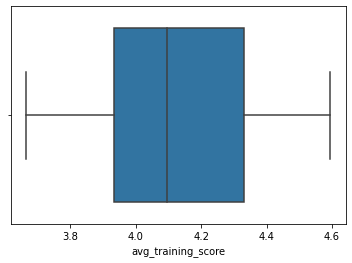

In [60]:
sns.boxplot(np.log(full_data.avg_training_score))

In [61]:
full_data.avg_training_score=np.log(full_data.avg_training_score)

# after exmine all the data let check and encode and then split data

In [62]:
full_data.dtypes

department               object
region                    int64
education               float64
gender                    int64
recruitment_channel      object
no_of_trainings           int64
age                     float64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score      float64
is_promoted             float64
dtype: object

# lets get dummies then proceed

In [63]:
full_data.shape

(78298, 13)

In [64]:
full_data_encoded=pd.get_dummies(full_data,drop_first=True)

In [65]:
full_data_encoded.shape

(78298, 21)

In [66]:
# lets seprate data in original train test

In [67]:
train_processed_data=full_data_encoded.loc[~full_data_encoded.is_promoted.isnull(),]
X=train_processed_data.drop('is_promoted',axis=1)
y=train_processed_data.is_promoted

In [68]:
test_processed_data=full_data_encoded.loc[full_data_encoded.is_promoted.isnull(),]
test_processed_data=test_processed_data.drop('is_promoted',axis=1)

In [69]:
# lets divide train processed data in train and test for verification and scale the data

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,stratify=y,random_state=4)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38365, 20), (16443, 20), (38365,), (16443,))

In [71]:
# lets scale Data

In [72]:
sc=StandardScaler()

 *lets extract numerical variables for scaling

In [73]:
X_train.columns

Index(['region', 'education', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'recruitment_channel_referred', 'recruitment_channel_sourcing'],
      dtype='object')

In [74]:
num=['region', 'education','no_of_trainings', 'age','previous_year_rating', 'length_of_service','avg_training_score']

In [75]:
sc.fit(X_train[num])

StandardScaler()

In [76]:
X_train.loc[:,num]=sc.transform(X_train[num])
X_test.loc[:,num]=sc.transform(X_test[num])
test_processed_data.loc[:,num]=sc.transform(test_processed_data[num])

# Data is ready for Modeling

# Model 1::Linear Logistic

In [77]:
X_train['const']=1
X_test['const']=1
model_logistic=sm.Logit(y_train,X_train).fit()
model_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.200989
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                38365
Model:                          Logit   Df Residuals:                    38344
Method:                           MLE   Df Model:                           20
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.3099
Time:                        20:20:58   Log-Likelihood:                -7711.0
converged:                       True   LL-Null:                       -11174.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                           0.0583      0.023      2.540      0.011       0.013       0.103
education                        0.1425      0.024      5.983      0.000       0.096       0.189
gender                           0.0325      0.049      0.661      0.509      -0.064       0.129
no_of_trainings                 -0.0650      0.023     -2.815      0.005      -0.110      -0.020
age                             -0.2561      0.032     -8.089      0.000      -0.318      -0.194
previous_year_rating             0.3095      0.025     12.283      0.000       0.260       0.359
length_of_service                0.1303      0.029      4.570      0.000       0.074       0.186
KPIs_met >80%                    1.8804      0.052     35.970      0.000       1.778       1.983
awards_won?                      1.4994      0.093     16.191      0.000       1.318       1.681
avg_training_score               4.0692      0.081     50.128      0.000       3.910       4.228
department_Finance               6.2555      0.174     35.892      0.000       5.914       6.597
department_HR                    9.4978      0.239     39.709      0.000       9.029       9.967
department_Legal                 5.9975      0.246     24.401      0.000       5.516       6.479
department_Operations            6.3581      0.150     42.310      0.000       6.064       6.653
department_Procurement           3.6194      0.111     32.576      0.000       3.402       3.837
department_R&D                  -0.4073      0.170     -2.399      0.016      -0.740      -0.075
department_Sales & Marketing     9.9269      0.211     47.062      0.000       9.514      10.340
department_Technology            1.4030      0.085     16.602      0.000       1.237       1.569
recruitment_channel_referred    -0.0203      0.135     -0.151      0.880      -0.284       0.244
recruitment_channel_sourcing     0.0090      0.044      0.204      0.838      -0.077       0.095
const                           -9.8727      0.164    -60.056      0.000     -10.195      -9.551
================================================================================================
"""

In [78]:
ypridicted=model_logistic.predict(X_train)

In [79]:
ypridictedp5=[0 if x <0.5 else 1 for x in ypridicted]

In [80]:
from sklearn.metrics import accuracy_score,f1_score,roc_curve

In [81]:
accuracy_score(y_train,ypridictedp5),f1_score(y_train,ypridictedp5)

(0.9319953082236413, 0.38827667057444315)

* lets check the youndens index and find threshold probability

In [82]:
def youndensthres(yact,ypridictprob):
    fpr,tpr,thres=roc_curve(yact,ypridictprob)
    table=pd.DataFrame({'FPR':fpr,'TPR':tpr,'thres':thres,'diff':np.abs(fpr-tpr)})
    thres=table.sort_values('diff',ascending=False).thres.head(1)
    prid=[0 if x<thres.values[0] else 1 for x in ypridictprob]
    return prid

In [83]:
ytrainthres=youndensthres(y_train,model_logistic.predict(X_train))

In [84]:
accuracy_score(y_train,ytrainthres),f1_score(y_train,ytrainthres)

(0.7401277205786524, 0.35175552665799736)

In [85]:
# we see logistic is not performing well at any of the probability lets try some other algorithm

# Decision tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dct=DecisionTreeClassifier()

In [88]:
X_train=X_train.drop('const',axis=1)
X_test=X_test.drop('const',axis=1)

In [89]:
model=dct.fit(X_train,y_train)

In [90]:
model.score(X_train,y_train)

0.9998175420304966

In [91]:
model.score(X_test,y_test)

0.89965334792921

In [92]:
accuracy_score(y_train,model.predict(X_train)),f1_score(y_train,model.predict(X_train))

(0.9998175420304966, 0.9989278603155154)

In [93]:
f1_score(y_test,model.predict(X_test))

0.43839346494213755

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_train,model.predict(X_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35097
         1.0       1.00      1.00      1.00      3268

    accuracy                           1.00     38365
   macro avg       1.00      1.00      1.00     38365
weighted avg       1.00      1.00      1.00     38365



In [96]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     15043
         1.0       0.42      0.46      0.44      1400

    accuracy                           0.90     16443
   macro avg       0.68      0.70      0.69     16443
weighted avg       0.90      0.90      0.90     16443



In [97]:
# lets check same on thres probability

In [98]:
ytrthres=youndensthres(y_train,model.predict_proba(X_train)[:,1])
ytethres=youndensthres(y_test,model.predict_proba(X_test)[:,1])

In [99]:
f1_score(y_train,ytrthres),f1_score(y_test,ytethres)

(0.9989301543634419, 0.43839346494213755)

In [100]:
# not effective lets try parameter tunning
param=[{'criterion' :["gini", "entropy", "log_loss"],'max_depth':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'min_samples_split':[2,3,5,7,9,11,13,15,17]}]

In [101]:
est=DecisionTreeClassifier()

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
gse=GridSearchCV(estimator=est,param_grid=param)

In [104]:
gse.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                        16, 17, 18, 19, 20],
                          'min_samples_split': [2, 3, 5, 7, 9, 11, 13, 15,
                                                17]}])

In [105]:
gse.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 17}

In [106]:
dct=DecisionTreeClassifier(max_depth=16,min_samples_split=77)

In [107]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=16, min_samples_split=77)

In [108]:
ytrpredicted=dct.predict(X_train)
ytepredicted=dct.predict(X_test)
f1_score(y_train,ytrpredicted),f1_score(y_test,ytepredicted)

(0.5153977758768178, 0.5091088133924175)

In [109]:
# lets check youndens index thres

In [110]:
ythrestr=youndensthres(y_train,dct.predict_proba(X_train)[:,1])
ythreste=youndensthres(y_test,dct.predict_proba(X_test)[:,1])
f1_score(y_train,ythrestr),f1_score(y_test,ythreste)# not usefull

(0.42958401947447555, 0.36555460507556314)

In [111]:
# lets try smoting

In [112]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [113]:
dct=DecisionTreeClassifier()

In [114]:
xsm,ysm=sm.fit_resample(X_train,y_train)

In [115]:
dct.fit(xsm,ysm)

DecisionTreeClassifier()

In [116]:
ytrpredicted=dct.predict(xsm)
ytepredicted=dct.predict(X_test)
f1_score(ysm,ytrpredicted),f1_score(y_test,ytepredicted)

(0.9999002664311055, 0.42284632376143894)

In [117]:
#Lets try Random forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [119]:
rfe=RandomForestClassifier()
model_rfe=rfe.fit(X_train,y_train)
f1_score(y_train,model_rfe.predict(X_train)),f1_score(y_test,model_rfe.predict(X_test))

(0.9986211123027424, 0.46321243523316064)

In [120]:
f1_score(y_train,model_rfe.predict(X_train))
f1_score(y_test,model_rfe.predict(X_test))

0.46321243523316064

In [122]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [123]:
adb=AdaBoostClassifier()

In [124]:
modeladb=adb.fit(X_train,y_train)

In [125]:
print(classification_report(y_train,modeladb.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     35097
         1.0       0.71      0.16      0.27      3268

    accuracy                           0.92     38365
   macro avg       0.82      0.58      0.61     38365
weighted avg       0.91      0.92      0.90     38365



In [126]:
print(classification_report(y_test,modeladb.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     15043
         1.0       0.76      0.18      0.29      1400

    accuracy                           0.93     16443
   macro avg       0.84      0.59      0.63     16443
weighted avg       0.91      0.93      0.90     16443



In [127]:
f1_score(y_train,modeladb.predict(X_train)),f1_score(y_test,modeladb.predict(X_test))

(0.2677595628415301, 0.2947610823258492)

In [128]:
# parameter tunning in adaboost

In [129]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}]
 

In [130]:
ada_model = AdaBoostClassifier(random_state = 10)
ada_grid = GridSearchCV(estimator = ada_model, 
                         param_grid = tuned_paramaters, 
                         cv = 5,
                         n_jobs=-1)

In [131]:
ada_grid.fit(X_train, y_train)
ada_grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

In [132]:
ada=AdaBoostClassifier(**ada_grid.best_params_,random_state = 10)
model_ada=ada.fit(X_train,y_train)
f1_score(y_train,model_ada.predict(X_train)),f1_score(y_test,model_ada.predict(X_test))

(0.24347376583096408, 0.27446300715990457)

In [133]:
# GB Boost

In [134]:
finaltestpridicted=dct.predict(test_processed_data)

In [135]:
submision=pd.DataFrame(test_data['employee_id'])

In [136]:
submision['is_promoted']=finaltestpridicted

In [137]:
submision.is_promoted=submision.is_promoted.astype('int')

In [138]:
submision.to_csv(r"C:\Users\jakha\Downloads\hr analytic full\submision.csv", index = False)


In [139]:
# lets try stacking and voting

In [141]:
from xgboost import XGBClassifier

In [143]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [144]:
from catboost import CatBoostClassifier

In [145]:
from lightgbm import LGBMClassifier

In [148]:
from sklearn.ensemble import StackingClassifier,VotingClassifier

In [169]:
Classifiers = {'0.XGBoost' : XGBClassifier(),
               '1.CatBoost' : CatBoostClassifier(),
               '2.LightGBM' : LGBMClassifier()
 }

In [ ]:
Classifiers = {'0.XGBoost' : XGBClassifier(learning_rate =0.1,
                                           n_estimators=494,
                                           max_depth=5,
                                           subsample = 0.70,
                                           verbosity = 0,
                                           scale_pos_weight = 2.5,
                                           updater ="grow_histmaker",
                                           base_score  = 0.2),
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=494,
                                                 subsample=0.085,
                                                 max_depth=5,
                                                 scale_pos_weight=2.5),
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300,
                                             boosting_type = 'dart',
                                             learning_rate=0.15,
                                             n_estimators=494,
                                             max_depth=5,
                                             scale_pos_weight=2.5)
 }

In [166]:
vm=VotingClassifier(estimators=Classifiers)

In [168]:
vm.fit(X_train,y_train)

ValueError: too many values to unpack (expected 2)